# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data.csv', nrows=50000)
resource_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 18 columns]

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:27<00:00, 1813.85it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

In [20]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 42222.20it/s]


In [0]:
project_data['project_title'] = preprocessed_titles

In [0]:
#Preprocessing project_grade_category

#reference link: https://stackoverflow.com/questions/28986489/python-pandas-how-to-replace-a-characters-in-a-column-of-a-dataframe

project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ', '_')

## 1.5 Preparing data for models

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [24]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (50000, 9)


In [25]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (50000, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [27]:
#school state
#Using CountVectorizer to convert values into one hot encoded
vectorizer = CountVectorizer(lowercase=False , binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print('Shape of matrix after one hot encoding', school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encoding (50000, 51)


In [28]:
#teacher_prefix
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
#While running this i got an error:np.nan is an invalid document, expected byte or unicode string.
#I fixed it by using stackoverflow.com
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('U')) #here also i did same as above
print('Shape of matrix of one hot encoding', teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher', 'nan']
Shape of matrix of one hot encoding (50000, 6)


In [29]:
#project_grade_category  
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values.astype('U'))
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.fit_transform(project_data['project_grade_category'].values.astype('U'))
print('Shape of matrix of one hot encoding', project_grade_category_one_hot.shape)

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
Shape of matrix of one hot encoding (50000, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [30]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (50000, 12211)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [32]:
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (50000, 2039)


#### 1.5.2.2 TFIDF vectorizer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 12211)


In [34]:
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 2039)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [35]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/Colab Notebooks/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [37]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 50000/50000 [00:15<00:00, 3282.40it/s]

50000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [39]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 50000/50000 [01:43<00:00, 481.32it/s]

50000
300


In [0]:
# Similarly you can vectorize for title also

In [41]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles.append(vector)

print(len(tfidf_w2v_vectors_titles))
print(len(tfidf_w2v_vectors_titles[0]))

100%|██████████| 50000/50000 [00:01<00:00, 28799.58it/s]

50000
300


### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [43]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 299.33367619999996, Standard deviation : 378.20927190421384


In [44]:
price_standardized

array([[-0.38268146],
       [-0.00088225],
       [ 0.57512161],
       ...,
       [-0.65382764],
       [-0.52109689],
       [ 0.54492668]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [45]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(50000, 9)
(50000, 30)
(50000, 12211)
(50000, 1)


In [46]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(50000, 12251)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [48]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download()

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> vader_lexicon

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
y = project_data['project_is_approved'].values

x = project_data.drop(['project_is_approved'], axis=1)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [52]:
#encoding numerical features

#Price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(x['price'].values.reshape(1, -1))

x_price_norm = normalizer.transform(x['price'].values.reshape(1, -1))

print('AFter vectorizations:')
print(x_price_norm.shape, y.shape)

AFter vectorizations:
(1, 50000) (50000,)


In [53]:
#Teacher_number_of_previously_posted_projects

normalizer.fit(x['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

x_previous_projects_norm = normalizer.transform(x['teacher_number_of_previously_posted_projects'].values.reshape(1, -1))

print('After Vectorizations:')
print(x_previous_projects_norm.shape, y.shape)

After Vectorizations:
(1, 50000) (50000,)


In [54]:
#Encoding Categorical Features

#school_state
state_vectorizer = CountVectorizer()
state_vectorizer.fit(x['school_state'].values)

x_state_one_hot = state_vectorizer.transform(x['school_state'].values)

print("After Vectorizations:")
print(x_state_one_hot.shape, y.shape)

After Vectorizations:
(50000, 51) (50000,)


In [55]:
#teacher_prefix

teacher_vectorizer = CountVectorizer()
teacher_vectorizer.fit(x['teacher_prefix'].values.astype('U'))

x_teacher_one_hot = teacher_vectorizer.transform(x['teacher_prefix'].values.astype('U'))

print("After Vectorizations:")
print(x_teacher_one_hot.shape, y.shape)

After Vectorizations:
(50000, 6) (50000,)


In [56]:
#Project_grade_category

grade_vectorizer = CountVectorizer()
grade_vectorizer.fit(x['project_grade_category'].values)

x_grade_one_hot = grade_vectorizer.transform(x['project_grade_category'].values)

print("After Vectorizations:")
print(x_grade_one_hot.shape, y.shape)

After Vectorizations:
(50000, 4) (50000,)


In [57]:
#project_subject_categories


categories_vectorizer = CountVectorizer()
categories_vectorizer.fit(x['clean_categories'].values)

x_categories_one_hot = categories_vectorizer.transform(x['clean_categories'].values)

print("After Vectorizations:")
print(x_categories_one_hot.shape, y.shape)

After Vectorizations:
(50000, 9) (50000,)


In [58]:
#project_subject_subcategories


subcategories_vectorizer = CountVectorizer()
subcategories_vectorizer.fit(x['clean_subcategories'].values)

x_subcategories_one_hot = subcategories_vectorizer.transform(x['clean_subcategories'].values)

print("After Vectorizations:")
print(x_subcategories_one_hot.shape, y.shape)

After Vectorizations:
(50000, 30) (50000,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [60]:
essay_bow_vectorizer = CountVectorizer(min_df=10, ngram_range=(1,1))
essay_bow_vectorizer.fit(x['essay'].values)

x_essay_bow = essay_bow_vectorizer.transform(x['essay'].values) 

print("After Vectorizations:")
print(x_essay_bow.shape, y.shape)

After Vectorizations:
(50000, 12622) (50000,)


In [61]:
title_bow_vectorizer = CountVectorizer(min_df=10, ngram_range=(1,1))
title_bow_vectorizer.fit(x['project_title'].values)

x_title_bow = title_bow_vectorizer.transform(x['project_title'].values) 

print("After Vectorizations:")
print(x_title_bow.shape, y.shape)

After Vectorizations:
(50000, 2039) (50000,)


In [0]:
#Before merging, re-shape some features. if we dont reshape, we'll get error
#Re-shaping
x_price_norm = x_price_norm.reshape(-1,1)
x_previous_projects_norm = x_previous_projects_norm.reshape(-1,1)

In [0]:
#merging features

from scipy.sparse import hstack
x_bow = hstack((x_price_norm, x_previous_projects_norm, x_state_one_hot, x_teacher_one_hot, x_grade_one_hot, \
                x_categories_one_hot, x_subcategories_one_hot, x_essay_bow, x_title_bow)).tocsr()

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [65]:
from sklearn.feature_selection import SelectKBest, chi2

top_features = SelectKBest(chi2, k=5000).fit_transform(x_bow, y)
top_features.shape

(50000, 5000)

In [66]:
top_features = top_features[:30000]
top_features.shape

(30000, 5000)

<h2>2.5 Apply Kmeans</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
# Reference https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [0]:
from sklearn.cluster import KMeans
inertias = []

K = range(1, 6)
for k in K:
    model = KMeans(n_clusters=k).fit(top_features)
    model.fit(top_features)
    inertias.append(model.inertia_)
 

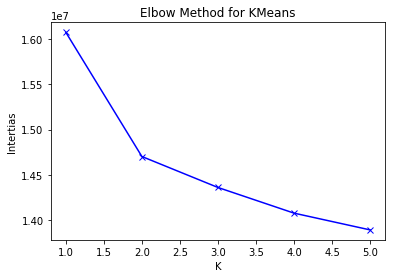

In [0]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('Intertias')
plt.title('Elbow Method for KMeans')
plt.show()

In [67]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2, n_jobs=-1)
model.fit(top_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
a = model.labels_

In [0]:
project_data = project_data[:30000]
project_data['Kmeans_labels'] = a

In [70]:
project_data['Kmeans_labels'].value_counts()

1    21029
0     8971
Name: Kmeans_labels, dtype: int64

In [0]:
#getting essays where Kmeans_labels == 0
essays_0 = project_data.loc[project_data['Kmeans_labels'] == 0]
essays_0 = essays_0['essay']
essays_0 = essays_0[:100]  #Taking only 100 essays for the wrodcloud

In [0]:
import nltk
from wordcloud import WordCloud, STOPWORDS 

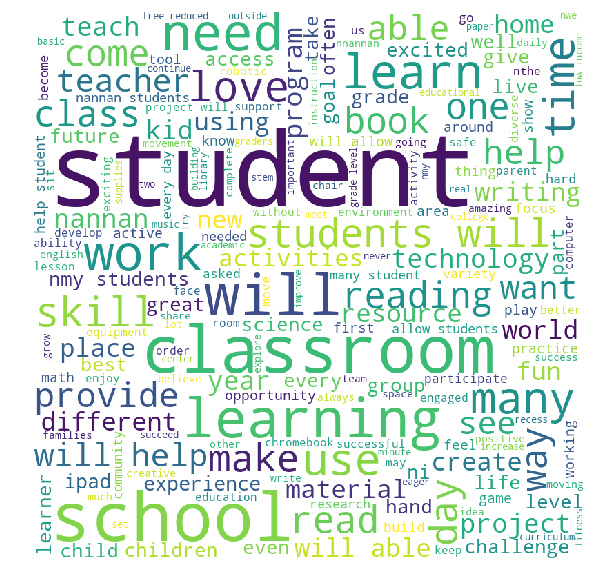

In [73]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_0: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about studies, school things etc.

In [79]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'work', 'learning', 'skill', 'use', 'teacher', 'read', 'need', 'book', 'able', 'writing', 'help', 'love', 'provide']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
work
learning
skill
use
teacher
read
need
book
able
writing
help
love
provide


In [0]:
#getting essays where Kmeans_labels == 1
essays_1 = project_data.loc[project_data['Kmeans_labels'] == 1]
essays_1 = essays_1['essay']
essays_1 = essays_1[:100]  #Taking only 100 essays for the wrodcloud

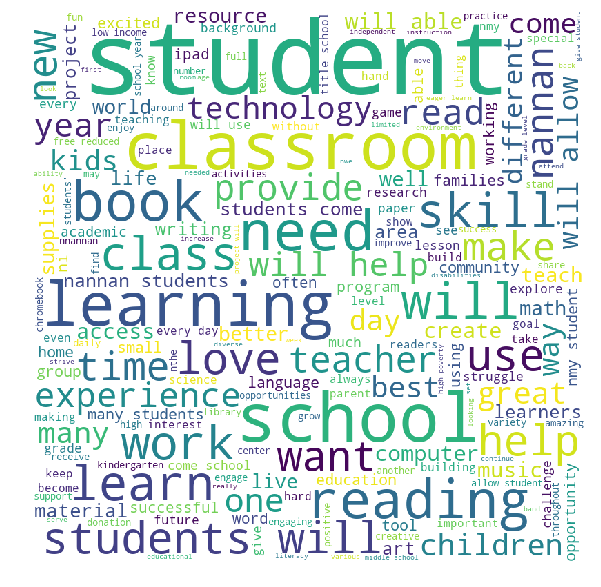

In [75]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about school, and things in school like class, learn, materials etc.

In [80]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'work', 'learning', 'skill', 'use', 'teacher', 'read', 'need', 'book', 'able', 'writing', 'help', 'computer', 'provide', \
    'experience', 'year', 'kids', 'make', 'different', 'allow']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
work
learning
skill
use
teacher
read
need
book
able
writing
help
computer
provide
experience
year
kids
make
different
allow


<h2>2.6 Apply AgglomerativeClustering</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
#Converting top_features into dense, because model is throwing an error to convert it into dense
top_features = top_features.toarray()

In [0]:
#With 2 clusters
model = AgglomerativeClustering(n_clusters=2)
model.fit(top_features)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [0]:
a = model.labels_

In [0]:
project_data = project_data[:30000]
project_data['Agglomerative_2clusters_labels'] = a

In [0]:
project_data['Agglomerative_2clusters_labels'].value_counts()

0    24647
1     5353
Name: Agglomerative_2clusters_labels, dtype: int64

In [0]:
#getting essays where Agglomerative_2clusters_labels == 0
essays_0 = project_data.loc[project_data['Agglomerative_2clusters_labels'] == 0]
essays_0 = essays_0['essay']
essays_0 = essays_0[:100]  #Taking only 100 essays for the wrodcloud

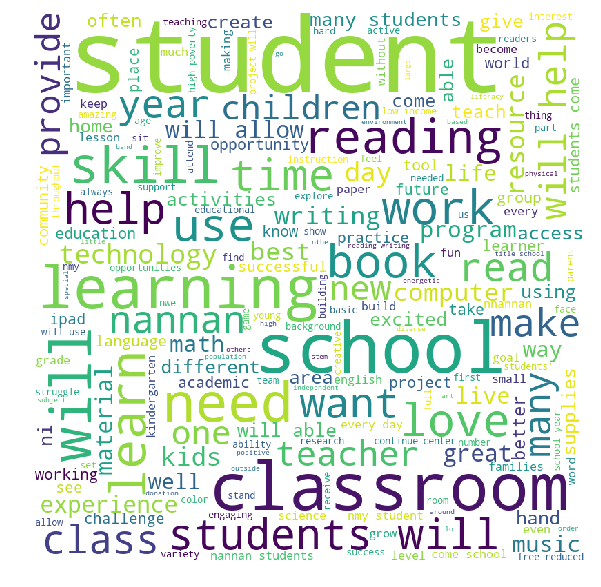

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_0: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about students and student life like learning, read, skill, love etc.

In [81]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', 'year', 'learn', ' student', 'time', 'work', 'learning', 'skill', 'use', 'teacher', 'read', 'need', 'book', 'able', 'writing', 'help', \
     'love', 'provide', 'technology', 'great', 'best']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
year
learn
 student
time
work
learning
skill
use
teacher
read
need
book
able
writing
help
love
provide
technology
great
best


In [0]:
#getting essays where Agglomerative_2clusters_labels == 1
essays_1 = project_data.loc[project_data['Agglomerative_2clusters_labels'] == 1]
essays_1 = essays_1['essay']
essays_1 = essays_1[:100]  #Taking only 100 essays for the wrodcloud

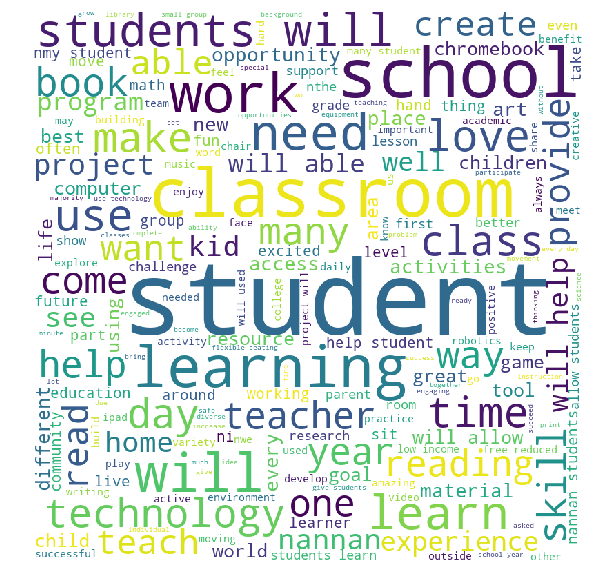

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points are about students and students needs in school etc

In [82]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'will', 'create', 'work', 'learning', 'skill', 'use', 'teacher', 'read', 'need', 'book', 'able', 'writing', 'help', 'love', \
     'provide', 'make', 'project', 'computer', 'use', 'many', 'reading', 'goal']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
will
create
work
learning
skill
use
teacher
read
need
book
able
writing
help
love
provide
make
project
computer
use
many
reading
goal


In [0]:
#With 5 clusters
model = AgglomerativeClustering(n_clusters=5)
model.fit(top_features)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [0]:
a = model.labels_
project_data['Agglomerative_5clusters_labels'] = a

In [0]:
project_data['Agglomerative_5clusters_labels'].value_counts()

0    12608
1     7365
3     4674
4     3448
2     1905
Name: Agglomerative_5clusters_labels, dtype: int64

In [0]:
#getting essays where Agglomerative_2clusters_labels == 0
essays_0 = project_data.loc[project_data['Agglomerative_5clusters_labels'] == 0]
essays_0 = essays_0['essay']
essays_0 = essays_0[:100]  #Taking only 100 essays for the wrodcloud

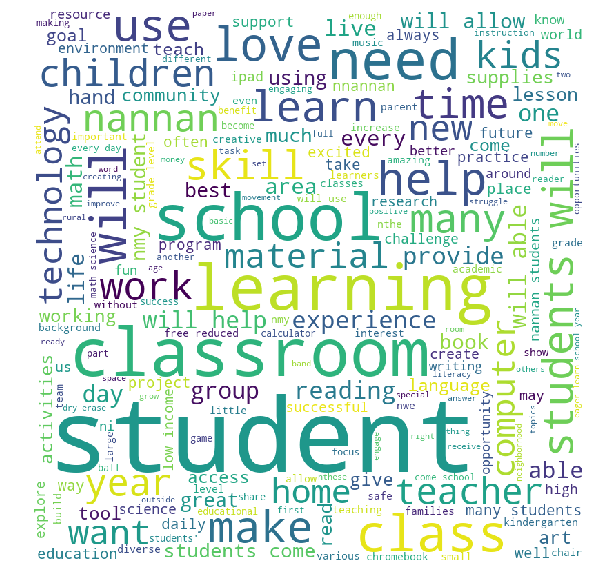

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_0: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about school things

In [83]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'technology', 'create', 'work', 'learning', 'skill', 'teacher', 'read', 'need', 'book', 'community', 'writing', 'help',\
     'love', 'computer', 'time', 'project', 'material', 'use', 'many', 'reading', 'kids', 'children']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
technology
create
work
learning
skill
teacher
read
need
book
community
writing
help
love
computer
time
project
material
use
many
reading
kids
children


In [0]:
#getting essays where Agglomerative_2clusters_labels == 1
essays_1 = project_data.loc[project_data['Agglomerative_5clusters_labels'] == 1]
essays_1 = essays_1['essay']
essays_1 = essays_1[:100]  #Taking only 100 essays for the wrodcloud

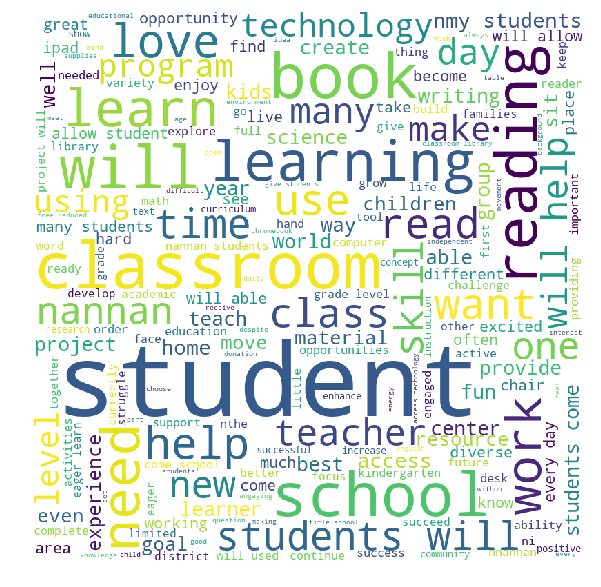

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about student, school things

In [84]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'learning', 'skill', 'writing', 'help', 'love', 'technology', 'program', 'book', 'time', 'want', 'skill', 'help', 'need'\
      'project', 'reading', 'goal']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
learning
skill
writing
help
love
technology
program
book
time
want
skill
help
needproject
reading
goal


In [0]:
#getting essays where Agglomerative_2clusters_labels == 2
essays_2 = project_data.loc[project_data['Agglomerative_5clusters_labels'] == 2]
essays_2 = essays_2['essay']
essays_2 = essays_2[:100]  #Taking only 100 essays for the wrodcloud

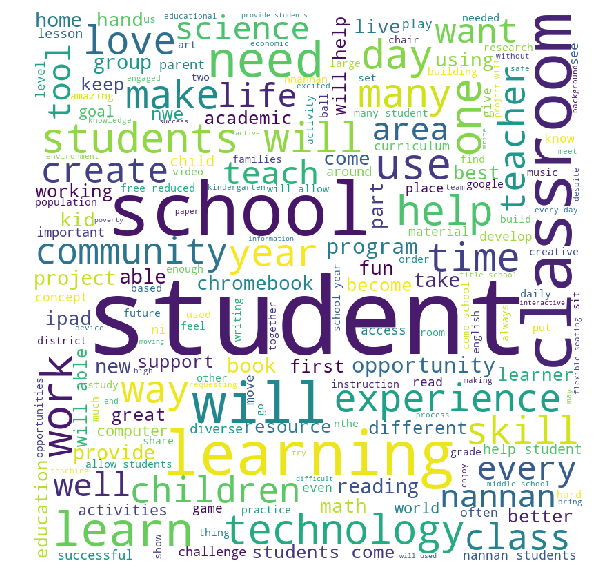

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_2: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about school, classroom, students

In [85]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'learning', 'skill', 'writing', 'help', 'love', 'science', 'life', 'create', 'academic', 'communtiy', 'year', 'program',\
      'reading', 'goal', 'experience', 'opportunity', 'technology', 'provide']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
learning
skill
writing
help
love
science
life
create
academic
communtiy
year
program
reading
goal
experience
opportunity
technology
provide


In [0]:
#getting essays where Agglomerative_2clusters_labels == 3
essays_3 = project_data.loc[project_data['Agglomerative_5clusters_labels'] == 3]
essays_3 = essays_3['essay']
essays_3 = essays_3[:100]  #Taking only 100 essays for the wrodcloud

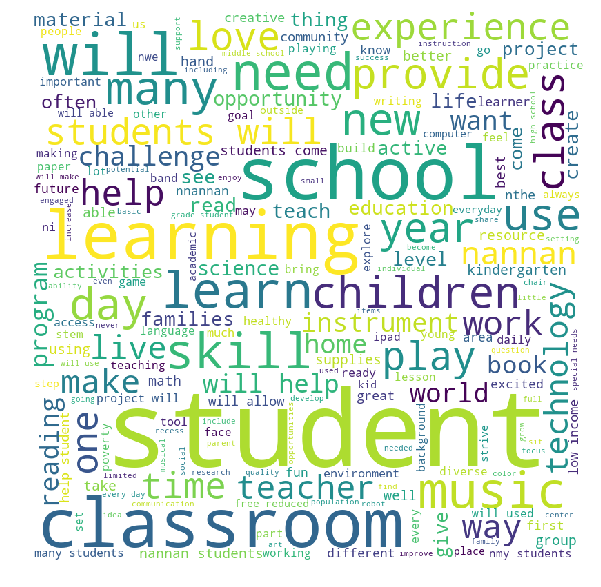

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_3: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are aout school, learning, love, help etc

In [86]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'learning', 'skill', 'writing', 'help', 'love', 'experience', 'need', 'help', 'challenge', 'create', 'instrument', 'way' \
      'reading', 'goal', 'play', 'education']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
learning
skill
writing
help
love
experience
need
help
challenge
create
instrument
wayreading
goal
play
education


In [0]:
#getting essays where Agglomerative_2clusters_labels == 4
essays_4 = project_data.loc[project_data['Agglomerative_5clusters_labels'] == 4]
essays_4 = essays_4['essay']
essays_4 = essays_4[:100]  #Taking only 100 essays for the wrodcloud

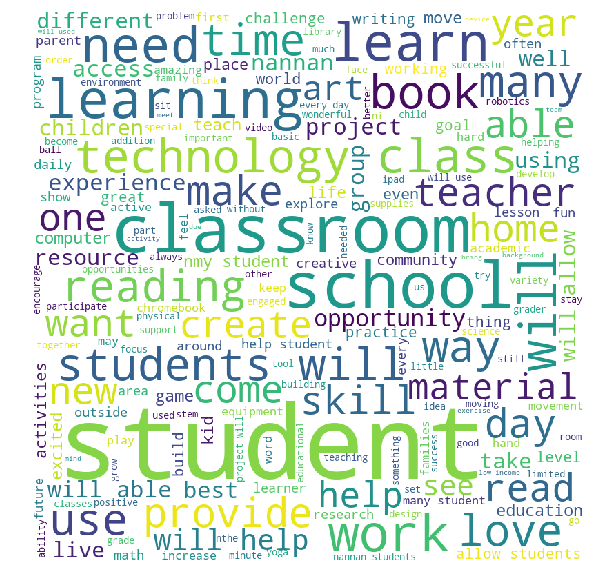

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_4: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about learning, technologies, experience etc.

In [87]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'learning', 'skill', 'writing', 'help', 'love', 'need', 'year', 'book', 'many', 'project', 'material', 'create', 'provide', \
      'reading', 'goal', 'help', 'opportunity', 'home', 'computer', 'will', 'way', 'reading', 'want', 'use']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
learning
skill
writing
help
love
need
year
book
many
project
material
create
provide
reading
goal
help
opportunity
home
computer
will
way
reading
want
use


<h2>2.7 Apply DBSCAN</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.feature_selection import SelectKBest, chi2

features = SelectKBest(chi2, k=1500).fit_transform(x_bow, y)
features = features[:30000]
features.shape

(30000, 1500)

In [0]:
#https://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import NearestNeighbors

ns = 2*1500
nbrs = NearestNeighbors(n_neighbors=ns).fit(features)
distances, indices = nbrs.kneighbors(features)



In [0]:
distancesDec = sorted(distances[:, ns-1], reverse=True)

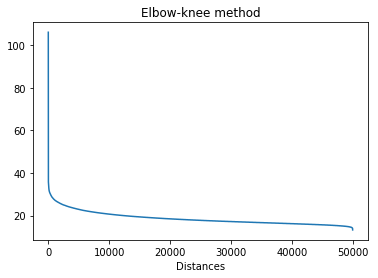

In [0]:
import matplotlib.pyplot as plt

plt.plot(distancesDec)
plt.xlabel('Distances')
plt.title('Elbow-knee method')
plt.show()

In [0]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=25)
model.fit(features)

DBSCAN(algorithm='auto', eps=25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
a = model.labels_


In [0]:
project_data = project_data[:30000]
project_data['DBSCAN_labels'] = a

In [0]:
project_data['DBSCAN_labels'].value_counts()

 0    29953
-1       47
Name: DBSCAN_labels, dtype: int64

In [0]:
essays_0 = project_data.loc[project_data['DBSCAN_labels'] == 0]
essays_0 = essays_0['essay']
essays_0 = essays_0[:100]  #Taking only 100 essays for the wrodcloud

In [0]:
import nltk
from wordcloud import WordCloud, STOPWORDS 

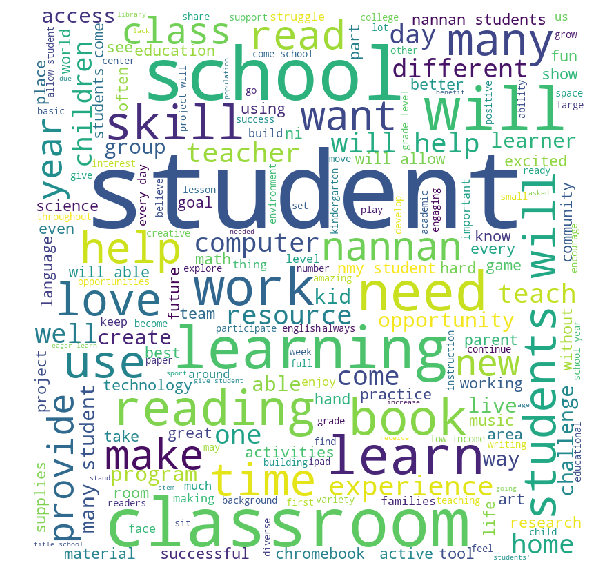

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_0: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about students and school

In [88]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'school', ' student', 'learning', 'skill', 'want', 'many', 'different', 'computer', 'need', 'writing', 'help', 'love', 'use', 'book', 'learn' \
      'reading', 'goal', 'time', 'experience', 'live', 'opportunity']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
school
 student
learning
skill
want
many
different
computer
need
writing
help
love
use
book
learnreading
goal
time
experience
live
opportunity


In [0]:
essays_1 = project_data.loc[project_data['DBSCAN_labels'] == -1]
essays_1 = essays_1['essay']

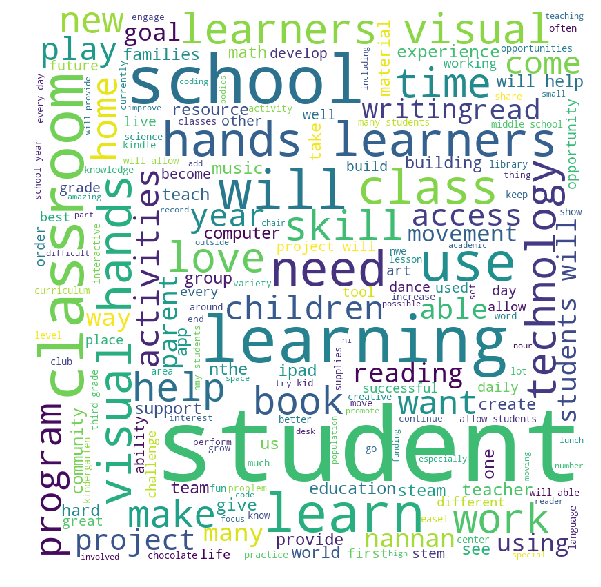

In [0]:
comment_words = ' '
stopwords = set(STOPWORDS)

for val in essays_1: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [0]:
#Most of the points in the above cluster are about student, learning, skils, time etc

In [89]:
#Manually printing a few top words from the above wordcloud plot

a = ['classroom', 'visual', 'learners', 'hands', 'project', 'school', ' student', 'learning', 'skill', 'writing', 'help', 'love', 'technology', 'home', 'activities', \
      'reading', 'goal', 'access', 'movement', 'way']
print('Some top words:')
for i in range(len(a)):
  print(a[i])

Some top words:
classroom
visual
learners
hands
project
school
 student
learning
skill
writing
help
love
technology
home
activities
reading
goal
access
movement
way


<h1>3. Cocnlusions</h1>
<br> Please write down few lines of your observations on this assignment.

In [0]:
#I think this assignment is very useful because we implemented all three most important clustering algorithms.
#In this assignment I've used some new techniques like SelectKBest, elbow plot which I haven't used in any of the previous assignments.
#These clustering algorithms are computationally expensive. They're taking so much of time even with 30k points